# Understanding the Andriod Users
***

### Description of the dataset
***

1) App : Name of the App.                                    
2) Category : Category under which the App falls.               
3) Rating : Application's rating on playstore.              
4) Reviews : Number of reviews of the App.               
5) Size : Size of the App.                        
6) Install : Number of Installs of the App.                     
7) Type : If the App is free/paid.                            
8) Price : Price of the app (0 if it is Free).                    
9) Content Rating : Appropiate Target Audience of the App.                  
10) Genres: Genre under which the App falls.                         
11) Last Updated : Date when the App was last updated.               
12) Current Ver : Current Version of the Application.                    
13) Android Ver : Minimum Android Version required to run the App.                   

### Import Packages
***

In [1]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

### Read the Data
***

In [2]:
play_store_df = pd.read_csv('../Google Playstore - EDA\Data Set\google-play-store-apps\googleplaystore.csv')

In [3]:
play_store_df.shape

(10841, 13)

In [4]:
# Examine the dataset
play_store_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Data Quality Check
***

In [5]:
# Chech if there are any missing values in the dataset.
play_store_df.isnull().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

In [6]:
play_store_df.isnull().sum().sort_values(ascending=False)

Rating            1474
Current Ver          8
Android Ver          3
Content Rating       1
Type                 1
Last Updated         0
Genres               0
Price                0
Installs             0
Size                 0
Reviews              0
Category             0
App                  0
dtype: int64

### Handle Null values
***

In [7]:
play_store_clean_df = play_store_df.dropna(subset = ['Rating', 'Type','Content Rating', 'Current Ver', 'Android Ver'], how = 'any')

In [8]:
play_store_clean_df.shape

(9360, 13)

In [9]:
# After dropping the null values, check if there are null left
play_store_clean_df.isnull().any()

App               False
Category          False
Rating            False
Reviews           False
Size              False
Installs          False
Type              False
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver       False
Android Ver       False
dtype: bool

In [10]:
play_store_clean_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### Data Cleaning
***

As, we see the data type of each features they are not aligned to what the records suggest for that column, we need to change the data type accordingly. Also, there are special characters that we need to clean as part our analysis.

Lets Look at each column individually
***

In [11]:
play_store_clean_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

***
## 1. Size
#### The first column we need to consider is the Size. We need to standardize the Size column across all records. 

Let's convert the size and standardize to Kilo-Byte(KB)

In [12]:
play_store_clean_df.Size = play_store_clean_df.Size.apply(lambda x: x.replace('M', '000') if 'M' in x else x)
play_store_clean_df.Size = play_store_clean_df.Size.apply(lambda x: x.replace('k','') if 'k' in str(x) else x)
play_store_clean_df.Size = play_store_clean_df.Size.apply(lambda x: x.replace('.','') if '.' in str(x) else x)
play_store_clean_df.Size = play_store_clean_df.Size.apply(lambda x: x.replace('Varies with device','0') if 'Varies with device' in str(x) else x)
play_store_clean_df.Size = play_store_clean_df.Size.apply(lambda x: float(x))

C:\Users\wilfr\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


***
## 2. Reviews

In [13]:
play_store_clean_df.Reviews = play_store_clean_df.Reviews.apply(lambda x: float(x))

C:\Users\wilfr\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


***
## 3. Installs

In [14]:
play_store_clean_df.Installs = play_store_clean_df.Installs.apply(lambda x: x.replace('+','') if '+' in str(x) else x)
play_store_clean_df.Installs = play_store_clean_df.Installs.apply(lambda x: x.replace(',','') if ',' in str(x) else x)
play_store_clean_df.Installs = play_store_clean_df.Installs.apply(lambda x: float(x))

C:\Users\wilfr\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


***
## 4. Price

In [15]:
play_store_clean_df.Price = play_store_clean_df.Price.apply(lambda x: x.replace('$','') if '$' in str(x) else x)
play_store_clean_df.Price = play_store_clean_df.Price.apply(lambda x: float(x))

C:\Users\wilfr\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [22]:
play_store_clean_df.Category = play_store_clean_df.Category.astype("category")

C:\Users\wilfr\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [23]:
play_store_clean_df.dtypes

App                 object
Category          category
Rating             float64
Reviews            float64
Size               float64
Installs           float64
Type                object
Price              float64
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
dtype: object

### Exploratory Data Analysis
***

### Correlation Matrix

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068133,-0.002859,0.051337,-0.021919
Reviews,0.068133,1.000000,-0.023230,0.641605,-0.009824
Size,-0.002859,-0.023230,1.000000,-0.097758,0.002777
Installs,0.051337,0.641605,-0.097758,1.000000,-0.011895
Price,-0.021919,-0.009824,0.002777,-0.011895,1.000000


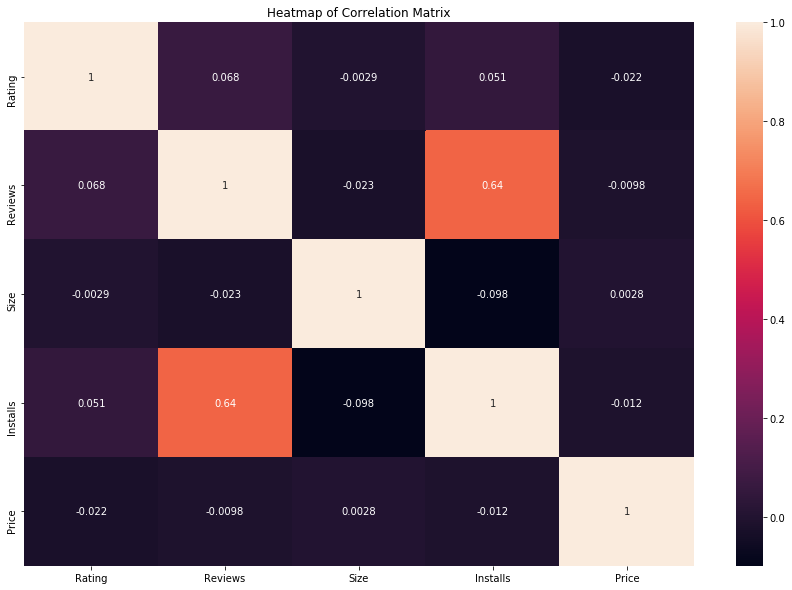

In [24]:
# Create a correlation matrix.
corr = play_store_clean_df.corr()

f,ax = plt.subplots(figsize = (15,10))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot = True,ax=ax)
plt.title('Heatmap of Correlation Matrix')
corr